In [3]:
import pandas as pd
import numpy as np

full_review_play = pd.read_csv("full_review_play.csv").iloc[:,1:]

full_review_play = full_review_play.sort_values("closedate_ifclose")

### This one looks just at the last few years, the effect is diminsihed
full_review_play_2 = full_review_play[full_review_play["year"]>2016]
#full_review_play_2 = full_review_play_2[full_review_play_2["year"]<2017]

full_review_play_2["state"].unique()

# QC
# BW

full_review_new =  full_review_play_2.drop(["business_id","name","year","state","closedate_ifclose"],axis=1).copy()

In [4]:
new = full_review_new[["is_open",'oldest_review', 'oldest_review_chain_avg', 'useful_mean',
       'stars_linear_coef', 'useful_sum', 'gender_std',
       'restaurant_density', 'Connoisseur', 'rating_sum',
       'reviews_per_week', 'latitude', 'compliment_plain_mean',
       'zreview_count_all', 'average_stars_mean', 'zstar_all_chain_std',
       'elite_count_mean', 'first_sent_mean', 'Male to Female',
       'first_sent_std_chain_avg', 'zreview_per_week_all']]

In [26]:
X = new.drop("is_open",axis=1)
y = new["is_open"]

In [39]:
from sklearn.feature_selection import RFE
from lightgbm import LGBMClassifier


estimator = LGBMClassifier()
selector = RFE(estimator, 8, step=1)
selector = selector.fit(X, y)

In [27]:
estimator = LGBMClassifier()
model = estimator.fit(X, y)

In [29]:
X.head()

oldest_review  oldest_review_chain_avg  useful_mean  stars_linear_coef  \
5323     279.428571               226.035714     1.200000          -0.000331   
5327     230.714286               230.714286     1.230769           0.000252   
5326     180.428571               306.678238     0.000000           0.001233   
5325     274.664355               274.664355     1.000000          -0.000527   
5324     275.571429               276.229435     0.833333          -0.001283   

      useful_sum  gender_std  restaurant_density  Connoisseur  rating_sum  \
5323         6.0    0.547723           22.000000     3.000000        15.0   
5327        16.0    0.518875           12.000000     2.833333        42.0   
5326         0.0    0.408248            8.000000     2.000000        13.0   
5325        21.0    0.511766          120.065834     3.500000        79.0   
5324        10.0    0.492366           31.000000     2.000000        22.0   

      reviews_per_week   latitude  compliment_plain_mean  zreview_count_all  \
5323          0.017894  43.707978             804.600000          -1.137578   
5327          0.056347  43.653221              59.692308          -0.940325   
5326          0.033254  41.412350               0.166667          -1.243189   
5325          0.546359  45.517876              17.761905          -0.007874   
5324          0.043546  40.543238               0.833333          -0.657583   

      average_stars_mean  zstar_all_chain_std  elite_count_mean  \
5323            3.422000             0.123026          3.600000   
5327            3.703077             0.000000          1.384615   
5326            2.586667             0.110892          0.000000   
5325            3.891429             0.000000          1.666667   
5324            3.255000             0.116958          0.250000   

      first_sent_mean  Male to Female  first_sent_std_chain_avg  \
5323        -0.007192        0.666667                  0.187086   
5327         0.208445        1.166667                  0.336311   
5326         0.075325        5.000000                  0.231738   
5325         0.193833        1.100000                  0.196315   
5324         0.042614        2.000000                  0.253847   

      zreview_per_week_all  
5323             -0.797614  
5327             -0.509451  
5326             -0.784852  
5325             -0.010693  
5324             -0.302124

In [30]:
fi = pd.DataFrame()
fi["feature"] = X.columns
fi["importance"] = model.feature_importances_

In [41]:
fi.sort_values("importance",ascending=False).head(8)

feature  importance
7          Connoisseur         250
16     first_sent_mean         185
2          useful_mean         176
3    stars_linear_coef         170
10            latitude         169
8           rating_sum         164
13  average_stars_mean         164
4           useful_sum         162

In [72]:
## For now I will do this
X_df = X.T
X_df["Value"] = selector.ranking_

X_df = X_df[X_df["Value"]==1]

X_df = X_df.drop("Value",axis=1).T

X_df.head()

oldest_review_chain_avg  useful_mean  Connoisseur  rating_sum  \
5323               226.035714     1.200000     3.000000        15.0   
5327               230.714286     1.230769     2.833333        42.0   
5326               306.678238     0.000000     2.000000        13.0   
5325               274.664355     1.000000     3.500000        79.0   
5324               276.229435     0.833333     2.000000        22.0   

      average_stars_mean  elite_count_mean  first_sent_mean  \
5323            3.422000          3.600000        -0.007192   
5327            3.703077          1.384615         0.208445   
5326            2.586667          0.000000         0.075325   
5325            3.891429          1.666667         0.193833   
5324            3.255000          0.250000         0.042614   

      zreview_per_week_all  
5323             -0.797614  
5327             -0.509451  
5326             -0.784852  
5325             -0.010693  
5324             -0.302124

In [73]:
X_df.shape

In [74]:
X_y = pd.concat((X_df, y),axis=1)

In [44]:
X_y.head()

oldest_review_chain_avg  useful_mean  Connoisseur  rating_sum  \
5323               226.035714     1.200000     3.000000        15.0   
5327               230.714286     1.230769     2.833333        42.0   
5326               306.678238     0.000000     2.000000        13.0   
5325               274.664355     1.000000     3.500000        79.0   
5324               276.229435     0.833333     2.000000        22.0   

      average_stars_mean  elite_count_mean  first_sent_mean  \
5323            3.422000          3.600000        -0.007192   
5327            3.703077          1.384615         0.208445   
5326            2.586667          0.000000         0.075325   
5325            3.891429          1.666667         0.193833   
5324            3.255000          0.250000         0.042614   

      zreview_per_week_all  is_open  
5323             -0.797614      1.0  
5327             -0.509451      0.0  
5326             -0.784852      1.0  
5325             -0.010693      0.0  
5324             -0.302124      0.0

In [45]:
var_typ = {}
for r in X_y.drop("is_open",axis=1).columns:
    var_typ[r] = "c" 
var_typ["is_open"] = "u"

In [52]:
from causality.inference.search import IC
from causality.inference.independence_tests import RobustRegressionTest

ic_algorithm = IC(RobustRegressionTest)
graph2 = ic_algorithm.search(X_y.sample(10000), var_typ)

graph2.edges(data=True)

Invalid value encountered in median
invalid value encountered in less_equal
invalid value encountered in less_equal
invalid value encountered in double_scalars


[('oldest_review_chain_avg',
  'rating_sum',
  {'arrows': ['oldest_review_chain_avg',
    'oldest_review_chain_avg',
    'rating_sum',
    'rating_sum'],
   'marked': False}),
 ('oldest_review_chain_avg',
  'average_stars_mean',
  {'arrows': ['oldest_review_chain_avg', 'oldest_review_chain_avg'],
   'marked': True}),
 ('oldest_review_chain_avg',
  'elite_count_mean',
  {'arrows': ['oldest_review_chain_avg', 'elite_count_mean'],
   'marked': False}),
 ('oldest_review_chain_avg',
  'zreview_per_week_all',
  {'arrows': ['zreview_per_week_all', 'zreview_per_week_all'],
   'marked': True}),
 ('useful_mean',
  'average_stars_mean',
  {'arrows': ['average_stars_mean'], 'marked': False}),
 ('useful_mean',
  'elite_count_mean',
  {'arrows': ['elite_count_mean'], 'marked': False}),
 ('Connoisseur',
  'rating_sum',
  {'arrows': ['rating_sum', 'rating_sum'], 'marked': True}),
 ('Connoisseur',
  'average_stars_mean',
  {'arrows': ['Connoisseur'], 'marked': True}),
 ('Connoisseur',
  'first_sent_mea

In [53]:
graph = graph2

causal_frame = pd.DataFrame(index=list(range(len(graph.edges(data=True)))))
causal_frame["Cause"] = ""
causal_frame["Effect"] = ""
causal_frame["Score"] = 0

In [54]:

for i, r in enumerate(graph.edges(data=True)):
    causal_frame.loc[i,"Cause"] = r[0]
    causal_frame.loc[i,"Effect"] = r[1]
    ba = str(graph.edges(data=True)[i]).split("], 'marked'")[0].split("'")[-2]
    print(ba)
    if ba =="arrows":
        causal_frame.loc[i,"Score"] = 0
    else:
        causal_frame.loc[i,"Score"] = 1
causal_frame.to_csv("graph_new.csv",index=False)

## If you can find a way to parse the above you can create this

rating_sum
oldest_review_chain_avg
elite_count_mean
zreview_per_week_all
average_stars_mean
elite_count_mean
rating_sum
Connoisseur
Connoisseur
Connoisseur
first_sent_mean
rating_sum
average_stars_mean
first_sent_mean
zreview_per_week_all
first_sent_mean
zreview_per_week_all


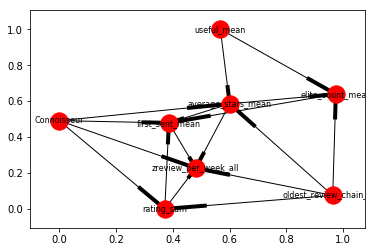

In [55]:
import cdt
import networkx as nx
from matplotlib import pyplot as plt
solution = cdt.utils.read_list_edges("graph_new.csv")  
nx.draw_networkx(solution, font_size=8) # The plot function allows for quick visualization of the graph. 
plt.show()

In [58]:
X_y.head().columns

Index(['oldest_review_chain_avg', 'useful_mean', 'Connoisseur', 'rating_sum',
       'average_stars_mean', 'elite_count_mean', 'first_sent_mean',
       'zreview_per_week_all', 'is_open'],
      dtype='object')

In [75]:
X_y_1 = X_y.copy()

In [76]:
X_y_1["average_stars_mean"] =  X_y_1["average_stars_mean"].apply(lambda x: 1 if x>3 else 0 )

In [77]:
X_y_1

oldest_review_chain_avg  useful_mean  Connoisseur  rating_sum  \
5323                226.035714     1.200000     3.000000        15.0   
5327                230.714286     1.230769     2.833333        42.0   
5326                306.678238     0.000000     2.000000        13.0   
5325                274.664355     1.000000     3.500000        79.0   
5324                276.229435     0.833333     2.000000        22.0   
5322                332.857143     4.104167     4.086957       196.0   
5328                145.428571     0.454545     3.000000        33.0   
5320                193.867468     0.423077     3.833333       104.0   
5319                480.000000     0.612245     2.681818       140.0   
5318                  0.000000     0.166667     4.500000        54.0   
5317                  0.000000     1.769231     3.500000        48.0   
5316                215.928571     1.127660     3.045455       159.0   
5315                  0.000000     0.428571     2.666667        22.0   
5321                182.714286     1.200000     4.500000        23.0   
5341                 18.571429     1.250000     3.750000        26.0   
5340                 90.428571     0.805556     4.235294       154.0   
5338                 78.142857     1.613636     3.357143       278.0   
5337                  0.000000     1.733333     2.571429        51.0   
5336                199.428571     0.750000     2.250000        13.0   
5335                481.372631     0.506024     3.368421       273.0   
5339                  0.000000     1.142857     3.000000        13.0   
5333                  0.000000     4.000000     3.000000        22.0   
5332                  0.000000     0.571429     3.166667        45.0   
5331                126.785714     1.128205     3.111111       116.0   
5330                  0.000000     0.833333     3.666667        22.0   
5329                  0.000000     2.428571     3.000000        23.0   
5334                313.071429     1.076923     3.166667        45.0   
5350                  0.000000     0.000000     2.833333        35.0   
5349                200.571429     1.740741     4.625000       255.0   
5348                  0.000000     0.846154     3.333333        50.0   
...                        ...          ...          ...         ...   
21226               425.142857     1.196429     3.629630       198.0   
21228               274.664355     1.142857     4.500000        66.0   
21254               302.685714     0.626667     2.970588       216.0   
21253                 0.000000     1.166667     2.333333        30.0   
21252               322.670918     0.280000     3.166667        77.0   
21251               472.428571     1.723404     4.238095       181.0   
21250                 0.000000     1.142857     4.058824       147.0   
21249               450.142857     0.853659     3.550000       168.0   
21248               405.250000     1.163793     3.220000       746.0   
21247                 0.000000     0.888889     3.000000        34.0   
21246                 0.000000     3.428571     2.333333        19.0   
21245                 0.000000     0.200000     2.800000        32.0   
21244               581.964286     0.888620     3.712500      1542.0   
21243               148.000000     0.333333     3.333333        16.0   
21227               291.857143     0.619048     3.900000       226.0   
21242               262.515732     0.500000     2.000000        29.0   
21240                40.857143     1.214286     4.050000       183.0   
21239               605.857143     1.796407     3.700000       650.0   
21238               166.000000     1.857143     3.000000        25.0   
21237                 0.000000     0.400000     3.000000        29.0   
21236               383.142857     1.048780     3.894737       157.0   
21235               379.321429     0.895735     3.348837       705.0   
21234               229.571429     1.666667     3.846154       103.0   
21233               480.857143     1.452229    

In [95]:
X_y_1["is_open"] = X_y_1["is_open"].astype(float)

In [96]:
X_y_1.head()

oldest_review_chain_avg  useful_mean  Connoisseur  rating_sum  \
5323               226.035714     1.200000     3.000000        15.0   
5327               230.714286     1.230769     2.833333        42.0   
5326               306.678238     0.000000     2.000000        13.0   
5325               274.664355     1.000000     3.500000        79.0   
5324               276.229435     0.833333     2.000000        22.0   

      average_stars_mean  elite_count_mean  first_sent_mean  \
5323                   1          3.600000        -0.007192   
5327                   1          1.384615         0.208445   
5326                   0          0.000000         0.075325   
5325                   1          1.666667         0.193833   
5324                   1          0.250000         0.042614   

      zreview_per_week_all  is_open  
5323             -0.797614      1.0  
5327             -0.509451      0.0  
5326             -0.784852      1.0  
5325             -0.010693      0.0  
5324             -0.302124      0.0

In [98]:
X_y_1.dtypes

oldest_review_chain_avg    float64
useful_mean                float64
Connoisseur                float64
rating_sum                 float64
average_stars_mean           int64
elite_count_mean           float64
first_sent_mean            float64
zreview_per_week_all       float64
is_open                    float64
dtype: object

In [87]:
import pandas as pd
import numpy as np
from causality.estimation.parametric import PropensityScoreMatching

N = 10000
z1 = np.random.normal(size=N)
z2 = np.random.normal(size=N)
z3 = np.random.normal(size=N)

In [88]:
p_d = 1. / (1. + np.exp(-(z1 + z2 + z3)/4.))
d = np.random.binomial(1, p=p_d)

y0 = np.random.normal()
y1 = y0 + z1 + z2 + z3

y = (d==1)*y1 + (d==0)*y0

X = pd.DataFrame({'d': d, 'z1': z1, 'z2': z2, 'z3': z3, 'y': y, 'y0': y0, 'y1': y1, 'p': p_d})

In [89]:
X[X['d'] == 1].mean()['y'] - X[X['d'] == 0].mean()['y']
(y1 - y0).mean()

In [93]:
X

d         p         y        y0        y1        z1        z2        z3  \
0     1  0.470134 -0.541193 -0.062769 -0.541193 -0.242629  0.355849 -0.591644   
1     0  0.468860 -0.062769 -0.062769 -0.561662  0.864683  0.054652 -1.418228   
2     1  0.394647 -1.774049 -0.062769 -1.774049 -1.470152  0.730857 -0.971985   
3     0  0.433736 -0.062769 -0.062769 -1.129259 -0.174255 -1.335355  0.443120   
4     1  0.566418  1.006231 -0.062769  1.006231  0.618947  0.848471 -0.398418   
5     0  0.396622 -0.062769 -0.062769 -1.741010 -0.989170 -1.164875  0.475805   
6     0  0.479611 -0.062769 -0.062769 -0.389178 -0.701287  1.104381 -0.729503   
7     0  0.389799 -0.062769 -0.062769 -1.855391 -1.384793  0.843958 -1.251788   
8     0  0.599678 -0.062769 -0.062769  1.553730  0.560847  1.952888 -0.897236   
9     0  0.445136 -0.062769 -0.062769 -0.944150  1.239437 -0.980313 -1.140505   
10    0  0.672832 -0.062769 -0.062769  2.821326  0.848964  0.952808  1.082323   
11    0  0.445730 -0.062769 -0.062769 -0.934523 -0.450991  0.558085 -0.978848   
12    1  0.521232  0.277143 -0.062769  0.277143 -1.150585  0.359766  1.130732   
13    1  0.303927 -3.377438 -0.062769 -3.377438 -1.800252 -1.671573  0.157155   
14    0  0.403766 -0.062769 -0.062769 -1.621953 -0.564657 -0.768622 -0.225905   
15    0  0.559544 -0.062769 -0.062769  0.894485 -0.047667  0.335560  0.669361   
16    0  0.380822 -0.062769 -0.062769 -2.007018 -0.841202 -0.066440 -1.036607   
17    1  0.732904  3.974858 -0.062769  3.974858  1.249853  1.281018  1.506756   
18    1  0.449865 -0.867638 -0.062769 -0.867638  0.601890 -0.083889 -1.322870   
19    1  0.505136  0.019407 -0.062769  0.019407 -1.513184  0.430846  1.164515   
20    0  0.502672 -0.062769 -0.062769 -0.020023  1.433406 -0.877166 -0.513494   
21    0  0.486901 -0.062769 -0.062769 -0.272399  0.895762 -0.606330 -0.499062   
22    0  0.532549 -0.062769 -0.062769  0.458752  0.279623  2.231222 -1.989324   
23    1  0.608125  1.694978 -0.062769  1.694978  0.712645  0.179656  0.865446   
24    1  0.593537  1.451663 -0.062769  1.451663  1.264675 -0.319989  0.569747   
25    1  0.398666 -1.706873 -0.062769 -1.706873 -1.101596 -1.234658  0.692150   
26    1  0.525857  0.351318 -0.062769  0.351318  0.306816  0.212549 -0.105277   
27    0  0.495987 -0.062769 -0.062769 -0.126977 -0.045256 -0.172139  0.153187   
28    0  0.505737 -0.062769 -0.062769  0.029019 -0.389789 -0.759166  1.240744   
29    0  0.541643 -0.062769 -0.062769  0.605070  0.618639 -0.464991  0.514192   
...  ..       ...       ...       ...       ...       ...       ...       ...   
9970  1  0.638663  2.215494 -0.062769  2.215494  2.330470  0.745693 -0.797900   
9971  1  0.458870 -0.722338 -0.062769 -0.722338 -0.494199  0.140985 -0.306355   
9972  1  0.403483 -1.626665 -0.062769 -1.626665 -1.385281  0.159087 -0.337702   
9973  1  0.565496  0.991230 -0.062769  0.991230 -0.840079  1.795232  0.098847   
9974  0  0.318247 -0.062769 -0.062769 -3.110124 -1.646515 -0.375661 -1.025178   
9975  0  0.284847 -0.062769 -0.062769 -3.744945 -1.888388  0.255545 -2.049332   
9976  1  0.639947  2.237769 -0.062769  2.237769  1.320640  0.239203  0.740696   
9977  0  0.629299 -0.062769 -0.062769  2.054066  0.965026  0.102442  1.049367   
9978  1  0.466242 -0.603725 -0.062769 -0.603725  0.666026 -0.507888 -0.699093   
9979  1  0.668418  2.741393 -0.062769  2.741393  0.866733  1.465800  0.471629   
9980  1  0.551466  0.763610 -0.062769  0.763610 -0.734214  0.989178  0.571415   
9981  1  0.558810  0.882569 -0.062769  0.882569 -0.019536  1.128705 -0.163830   
9982  1  0.378755 -2.042118 -0.062769 -2.042118 -0.497598 -0.486807 -0.994943   
9983  0  0.514471 -0.062769 -0.062769  0.168835  2.311458 -0.598800 -1.481053   
9984  0  0.681226 -0.062769 -0.062769  2.974873  1.172037  1.208604  0.657001   
9985  1  0.510495  0.105180 -0.062769  0.105180 -0.836638  0.310121  0.694466   
9986  0  0.481801 -0.062769 -0.062769 -0.354079  0.614545 -0.716396 -0.189459   
9987  0  0.604587 -0.062769 -0.062769

In [90]:
matcher = PropensityScoreMatching()
matcher.estimate_ATE(X, 'd', 'y', {'z1': 'c', 'z2': 'c', 'z3': 'c'})

Optimization terminated successfully.
         Current function value: 0.674210
         Iterations 4


In [101]:
X_y.dtypes

oldest_review_chain_avg    float64
useful_mean                float64
Connoisseur                float64
rating_sum                 float64
average_stars_mean         float64
elite_count_mean           float64
first_sent_mean            float64
zreview_per_week_all       float64
is_open                      int64
dtype: object

In [ ]:
X_y["d"] = X_y["average_stars_mean"]
X_y["d"] = X_y["average_stars_mean"]


In [106]:
X_y_1["is_open"] = X_y_1["is_open"].astype(int)

In [110]:
## To say the truth here, I don't believe these are any better
## than SHAP values and partial dependence plots - keeping all
## else equal and throwing stuff in. You can use those plots and
## still call it average treatment effects and what not and get 
## similar results as it is being controlled for. 

from causality.estimation.parametric import PropensityScoreMatching
X_y_1["is_open"] = X_y_1["is_open"].astype(float)

### The best way is just to cut below and above the median for 
### the binary "intervenetion"
matcher = PropensityScoreMatching()
matcher.estimate_ATE(X_y_1, 'average_stars_mean', 'is_open', {'oldest_review_chain_avg':'c', 'useful_mean':'c', 'Connoisseur':'c', 'rating_sum':'c', 'elite_count_mean':'c', 'first_sent_mean':'c',
       'zreview_per_week_all':'c'})
#matcher.estimate_ATE(X_y, 'd', 'y', {'z1': 'c', 'z2': 'c', 'z3': 'c'})

Optimization terminated successfully.
         Current function value: 0.082869
         Iterations 13


In [ ]:
import numpy
import pandas as pd

from causality.inference.search import IC
from causality.inference.independence_tests import RobustRegressionTest

# generate some toy data:
SIZE = 2000
x1 = numpy.random.normal(size=SIZE)
x2 = x1 + numpy.random.normal(size=SIZE)
x3 = x1 + numpy.random.normal(size=SIZE)
x4 = x2 + x3 + numpy.random.normal(size=SIZE)
x5 = x4 + numpy.random.normal(size=SIZE)

# load the data into a dataframe:
X = pd.DataFrame({'x1' : x1, 'x2' : x2, 'x3' : x3, 'x4' : x4, 'x5' : x5})

# define the variable types: 'c' is 'continuous'.  The variables defined here
# are the ones the search is performed over  -- NOT all the variables defined
# in the data frame.
variable_types = {'x1' : 'c', 'x2' : 'c', 'x3' : 'c', 'x4' : 'c', 'x5' : 'c'}

# run the search
ic_algorithm = IC(RobustRegressionTest)
graph = ic_algorithm.search(X, variable_types)


In [159]:
# Create a causal model from the data and given graph.
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["dot_graph"],
        )

# Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching")

# Refute the obtained estimate using multiple robustness checks.
refute_results=model.refute_estimate(identified_estimand, estimate,
        method_names=["random_common_cause", "placebo_treatment_refuter",
                      "data_subset_refuter"])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-f45e459ce7aa>", line 1, in <module>
    from dowhy.do_why import CausalModel
ModuleNotFoundError: No module named 'dowhy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1828, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1090, in get_records
    return _fixed_getinnerframes(etb, numbe

ModuleNotFoundError: No module named 'dowhy'

In [9]:
graph

In [39]:
options = {
    'node_size': 50,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 30,
}

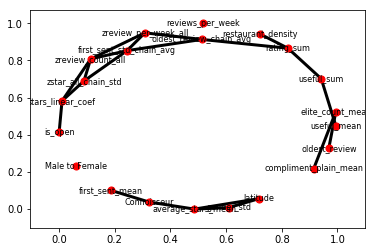

In [40]:
import networkx as nx
from matplotlib import pyplot as plt


nx.draw_networkx(graph, font_size=8) # The plot function allows for quick visualization of the graph. 
plt.show()


In [15]:
Y = full_review_new.pop("is_open")
Y = Y.astype(int)
X = full_review_new

X = X.drop(X.filter(regex="days|diffs").columns,axis=1)
#X["diffs_mean"] = full_review_new["diffs_mean"]
#X["days_mean"] = full_review_new["days_mean"]
#X["lat_long"] = full_review_new["latitude"] + full_review_new["longitude"]F

In [41]:
import numpy
import pandas as pd

from causality.inference.search import IC
from causality.inference.independence_tests import RobustRegressionTest

# generate some toy data:
SIZE = 2000
x1 = numpy.random.normal(size=SIZE)
x2 = x1 + numpy.random.normal(size=SIZE)
x3 = x1 + numpy.random.normal(size=SIZE)
x4 = x2 + x3 + numpy.random.normal(size=SIZE)
x5 = x4 + numpy.random.normal(size=SIZE)

# load the data into a dataframe:
X = pd.DataFrame({'x1' : x1, 'x2' : x2, 'x3' : x3, 'x4' : x4, 'x5' : x5})

# define the variable types: 'c' is 'continuous'.  The variables defined here
# are the ones the search is performed over  -- NOT all the variables defined
# in the data frame.
variable_types = {'x1' : 'c', 'x2' : 'c', 'x3' : 'c', 'x4' : 'c', 'x5' : 'c'}

# run the search
ic_algorithm = IC(RobustRegressionTest)
graph = ic_algorithm.search(X, variable_types)

In [4]:
lucas = pd.read_csv("NUM_LUCAS.csv")

In [8]:
var_typ = {}
for r in lucas.columns:
    var_typ[r] = "c" 

In [10]:
var_typ

{'Allergy': 'c',
 'Anxiety': 'c',
 'Attention_Disorder': 'c',
 'Car_Accident': 'c',
 'Coughing': 'c',
 'Fatigue': 'c',
 'Genetics': 'c',
 'Lung_Cancer': 'c',
 'Peer_Pressure': 'c',
 'Smoking': 'c',
 'Yellow_Fingers': 'c'}

In [12]:
# What is nice about the french guys work is that it also gives a scorew which is interesting. 
# run the search, I think his algorithm is just bettet
# Interesting, this is called inductive causlity, I like it. 
### This is simply a method of dumping a logt of things you tink is causal and finding a final outcome.

ic_algorithm = IC(RobustRegressionTest)
graph = ic_algorithm.search(lucas, var_typ)

graph.edges(data=True)

In [42]:
# Marked means satisfaction of genuine caustion 
#then that directed edge will have marked=True
graph.edges(data=True)

[('x1', 'x2', {'arrows': [], 'marked': False}),
 ('x1', 'x3', {'arrows': [], 'marked': False}),
 ('x2', 'x4', {'arrows': ['x4'], 'marked': False}),
 ('x3', 'x4', {'arrows': ['x4'], 'marked': False}),
 ('x4', 'x5', {'arrows': ['x5'], 'marked': True})]

In [119]:
str(graph.edges(data=True)[4]).split("], 'marked'")[0].split("'")[-2]

'x5'

In [126]:
causal_frame = pd.DataFrame(index=list(range(len(graph.edges(data=True)))))

In [130]:
graph.to_directed().edges(data=True)

[('x1', 'x2', {'arrows': [], 'marked': False}),
 ('x1', 'x3', {'arrows': [], 'marked': False}),
 ('x2', 'x1', {'arrows': [], 'marked': False}),
 ('x2', 'x4', {'arrows': ['x4'], 'marked': False}),
 ('x3', 'x1', {'arrows': [], 'marked': False}),
 ('x3', 'x4', {'arrows': ['x4'], 'marked': False}),
 ('x4', 'x2', {'arrows': ['x4'], 'marked': False}),
 ('x4', 'x3', {'arrows': ['x4'], 'marked': False}),
 ('x4', 'x5', {'arrows': ['x5'], 'marked': True}),
 ('x5', 'x4', {'arrows': ['x5'], 'marked': True})]

In [134]:
causal_frame = pd.DataFrame(index=list(range(len(graph.edges(data=True)))))
causal_frame["Cause"] = ""
causal_frame["Effect"] = ""
causal_frame["Score"] = 0

In [137]:
i

('x1', 'x2', {'arrows': [], 'marked': False})

In [141]:
r

('x2', 'x4', {'arrows': ['x4'], 'marked': False})

In [154]:
for i, r in enumerate(graph.edges(data=True)):
    causal_frame.loc[i,"Cause"] = r[0]
    causal_frame.loc[i,"Effect"] = r[1]
    ba = str(graph.edges(data=True)[i]).split("], 'marked'")[0].split("'")[-2]
    print(ba)
    if ba =="arrows":
        causal_frame.loc[i,"Score"] = 0
    else:
        causal_frame.loc[i,"Score"] = 1
causal_frame.to_csv("graph_new.csv",index=False)

## If you can find a way to parse the above you can create this
import cdt
solution = cdt.utils.read_list_edges("graph_new.csv")  
nx.draw_networkx(solution, font_size=8) # The plot function allows for quick visualization of the graph. 
plt.show()

arrows
arrows
x4
x4
x5


In [153]:
causal_frame

Cause Effect  Score
0    x1     x2      0
1    x1     x3      0
2    x2     x4      1
3    x3     x4      1
4    x4     x5      1

In [149]:
import re

str(graph.edges(data=True)[1]).split("], 'marked'")[0].split("'")[-2]

'arrows'

In [ ]:
.replace("'", "").strip("[]}")[0].replace(")", "")

In [107]:
ra.strip("[]}")[0].replace(")", "")

''

In [ ]:
.split("]")[0].replace("'", "")

In [82]:
str(graph.edges(data=True)[3]).split("'arrows': [")[1].split("]")[0].replace("'", "")

'x4'

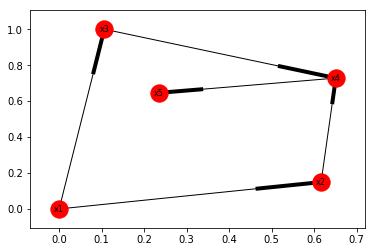

In [65]:
## If you can find a way to parse the above you can create this
import cdt
solution = cdt.utils.read_list_edges("graph.csv")  
nx.draw_networkx(solution, font_size=8) # The plot function allows for quick visualization of the graph. 
plt.show()

In [133]:
graph.edges(data=True)

[('x1', 'x2', {'arrows': [], 'marked': False}),
 ('x1', 'x3', {'arrows': [], 'marked': False}),
 ('x2', 'x4', {'arrows': ['x4'], 'marked': False}),
 ('x3', 'x4', {'arrows': ['x4'], 'marked': False}),
 ('x4', 'x5', {'arrows': ['x5'], 'marked': True})]

In [132]:
graph.to_directed().edges(data=True)

[('x1', 'x2', {'arrows': [], 'marked': False}),
 ('x1', 'x3', {'arrows': [], 'marked': False}),
 ('x2', 'x1', {'arrows': [], 'marked': False}),
 ('x2', 'x4', {'arrows': ['x4'], 'marked': False}),
 ('x3', 'x1', {'arrows': [], 'marked': False}),
 ('x3', 'x4', {'arrows': ['x4'], 'marked': False}),
 ('x4', 'x2', {'arrows': ['x4'], 'marked': False}),
 ('x4', 'x3', {'arrows': ['x4'], 'marked': False}),
 ('x4', 'x5', {'arrows': ['x5'], 'marked': True}),
 ('x5', 'x4', {'arrows': ['x5'], 'marked': True})]

In [131]:
nx.draw_networkx(graph.to_directed().edges(data=True), font_size=8) 


AttributeError: 'list' object has no attribute 'nodes'

In [62]:
graph.edges(data=True)[4][3]

IndexError: tuple index out of range

In [51]:
for r in graph.edges(data=True):
    

('x1', 'x2', {'marked': False, 'arrows': []})
('x1', 'x3', {'marked': False, 'arrows': []})
('x2', 'x4', {'marked': False, 'arrows': ['x4']})
('x3', 'x4', {'marked': False, 'arrows': ['x4']})
('x4', 'x5', {'marked': True, 'arrows': ['x5']})


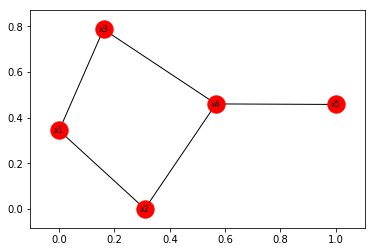

In [50]:
nx.draw_networkx(graph, arrows=True, font_size=8) # The plot function allows for quick visualization of the graph. 
plt.show()